# densMAP
The densMAP is a dimensionality reduction technique adapted from the UMAP explained in the section before. The densMAP has the advantage that it to some degree preserves the density of the data points while creating the manifold.

See also
* [Better Preserving Local Density with DensMAP (UMAP documentation)](https://umap-learn.readthedocs.io/en/latest/densmap_demo.html)

In [1]:
from skimage.data import human_mitosis
from napari_segment_blobs_and_things_with_membranes import voronoi_otsu_labeling
from napari_simpleitk_image_processing import label_statistics
from sklearn.preprocessing import StandardScaler
import numpy as np
import umap
import seaborn
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

As example dataset we use the same Tribolium dataset as in the trailer.

In [2]:
# Load data
image = cle.imread("../../data/Lund-25MB.tif")

# Segment nuclei
background_subtracted = cle.top_hat_box(image, radius_x=5, radius_y=5)
labels = cle.voronoi_otsu_labeling(background_subtracted, spot_sigma=1)

# Feature extraction
nuclei_statistics = label_statistics(image, labels, 
                                     intensity=True, 
                                     size=True, 
                                     shape=True, 
                                     perimeter=True,
                                     moments=True)

# Feature selection
selected_table = nuclei_statistics[
    [
        "mean",
        "variance",
        "elongation",
    ]
]
selected_statistics = selected_table.values

# Standard scaling
scaled_statistics = StandardScaler().fit_transform(selected_statistics)

## densMAP

In [3]:
reducer_u = umap.UMAP(densmap=True, random_state=42)
embedding_u = reducer_u.fit_transform(scaled_statistics)
type(embedding_u), embedding_u.shape

(numpy.ndarray, (1200, 2))

<AxesSubplot:>

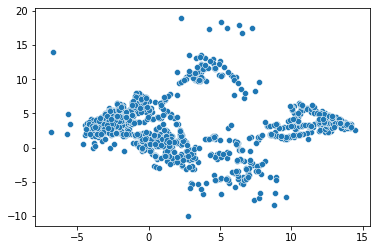

In [4]:
seaborn.scatterplot(x=embedding_u[:, 0], 
                    y=embedding_u[:, 1])

## Comparison to UMAP
Comparing the densMAP to the UMAP in this particular case, the points appear indeed denser. However, also outliers reside in the densMAP, which are not apparent in the corresponding UMAP

In [5]:
reducer_d = umap.UMAP(random_state=42)
embedding_d = reducer_d.fit_transform(scaled_statistics)
type(embedding_d), embedding_d.shape

(numpy.ndarray, (1200, 2))

<AxesSubplot:>

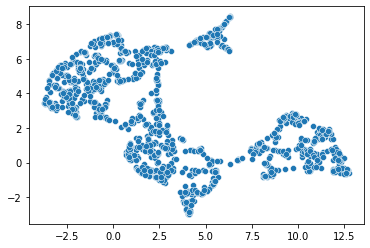

In [6]:
seaborn.scatterplot(x=embedding_d[:, 0], 
                    y=embedding_d[:, 1])